Running Gradient Descent...


<ipython-input-2-78d1cd5da0b6>:23: RuntimeWarning: overflow encountered in square
  j = np.sum(np.square(h_x - y))*(1/(2*m))
C:\Users\SAHANA L\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-2-78d1cd5da0b6>:33: RuntimeWarning: invalid value encountered in subtract
  theta = theta - ((alpha/m) *((np.dot(x.T, (h_x-y) ))))


Theta found by Gradient Descent: slope = [nan] and intercept [nan]


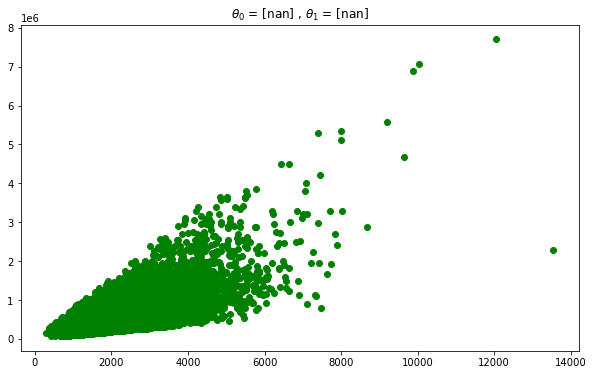

Text(0, 0.5, 'Cost')

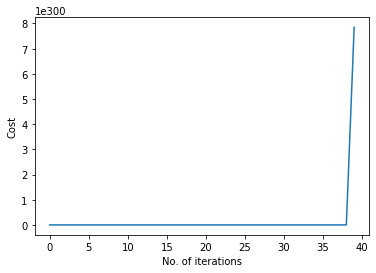

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv('house_data.csv')

Y = dataset[['price']]

X = dataset.drop(['price', 'id', 'date'],  axis=1)

x = X[['sqft_living']]
y = Y

xg = x.values.reshape(-1,1)
yg = y.values.reshape(-1,1)
xg = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)

def computeCost(x, y, theta):
    m = len(y)
    h_x = x.dot(theta)
    j = np.sum(np.square(h_x - y))*(1/(2*m))
    return j

def gradientDescent(x, y, theta, alpha, iteration):
    print('Running Gradient Descent...')
    j_hist = []
    m = len(y)
    for i in range(iteration):
        j_hist.append(computeCost(x, y, theta))
        h_x = x.dot(theta)
        theta = theta - ((alpha/m) *((np.dot(x.T, (h_x-y) ))))
        #theta[0] = theta[0] - ((alpha/m) *(np.sum((h_x-y))))
    return theta, j_hist

theta = np.zeros((2,1))
iteration = 2000
alpha = 0.001

theta, cost = gradientDescent(xg, yg, theta, alpha, iteration)
print('Theta found by Gradient Descent: slope = {} and intercept {}'.format(theta[1], theta[0]))

theta.shape

plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta[0], theta[1]))
plt.scatter(x,y, marker='o', color='g')
plt.plot(x,np.dot(x.values, theta.T))
plt.show()

plt.plot(cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')